In [27]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import os
import re

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
data_labelled = pd.read_csv("numeric_data.csv",index_col=0)

In [4]:
data_labelled.head()

,agent,airlin,airport,amp,bag,board,book,cancel,chang,check,...,thank,ticket,time,today,travel,tri,wait,way,work,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,good
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,average
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,worse


In [6]:
from sklearn.preprocessing import OneHotEncoder
le = OneHotEncoder()
y = le.fit_transform(np.array(data_labelled.label).reshape(-1, 1))

In [11]:
data_labelled.drop(columns = ['label'],inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_labelled, y, test_size=0.2, random_state=42)

In [20]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [21]:
input_dim = X_train.shape[1]
# Number of features
print(input_dim)

45


In [32]:
output_dim = y_train.shape[1]

In [40]:
model = Sequential()
model.add(layers.Dense(60, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 60)                2760      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 64        
Total params: 5,119
Trainable params: 5,119
Non-trainable params: 0
____________________________________________________

In [41]:
history = model.fit(X_train, y_train,
                     epochs=200,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=200)

Train on 11712 samples, validate on 2928 samples
Epoch 1/200
11712/11712 [==============================] - 0s 25us/sample - loss: 1.3206 - acc: 0.3683 - val_loss: 1.2374 - val_acc: 0.4098
Epoch 2/200
11712/11712 [==============================] - 0s 12us/sample - loss: 1.2160 - acc: 0.4253 - val_loss: 1.1580 - val_acc: 0.4778
Epoch 3/200
11712/11712 [==============================] - 0s 12us/sample - loss: 1.1501 - acc: 0.4699 - val_loss: 1.1188 - val_acc: 0.4884
Epoch 4/200
11712/11712 [==============================] - 0s 11us/sample - loss: 1.1215 - acc: 0.4939 - val_loss: 1.1093 - val_acc: 0.4942
Epoch 5/200
11712/11712 [==============================] - 0s 11us/sample - loss: 1.1119 - acc: 0.4995 - val_loss: 1.1028 - val_acc: 0.4949
Epoch 6/200
11712/11712 [==============================] - 0s 11us/sample - loss: 1.1049 - acc: 0.5037 - val_loss: 1.1036 - val_acc: 0.4911
Epoch 7/200
11712/11712 [==============================] - 0s 12us/sample - loss: 1.0980 - acc: 0.5094 - val_lo

Epoch 59/200
11712/11712 [==============================] - 0s 10us/sample - loss: 1.0288 - acc: 0.5465 - val_loss: 1.1037 - val_acc: 0.5003
Epoch 60/200
11712/11712 [==============================] - 0s 12us/sample - loss: 1.0249 - acc: 0.5483 - val_loss: 1.1067 - val_acc: 0.5017
Epoch 61/200
11712/11712 [==============================] - 0s 11us/sample - loss: 1.0282 - acc: 0.5448 - val_loss: 1.1106 - val_acc: 0.4969
Epoch 62/200
11712/11712 [==============================] - 0s 11us/sample - loss: 1.0270 - acc: 0.5473 - val_loss: 1.1072 - val_acc: 0.4980
Epoch 63/200
11712/11712 [==============================] - 0s 12us/sample - loss: 1.0250 - acc: 0.5499 - val_loss: 1.1097 - val_acc: 0.5007
Epoch 64/200
11712/11712 [==============================] - 0s 11us/sample - loss: 1.0225 - acc: 0.5476 - val_loss: 1.1112 - val_acc: 0.4980
Epoch 65/200
11712/11712 [==============================] - 0s 11us/sample - loss: 1.0211 - acc: 0.5493 - val_loss: 1.1095 - val_acc: 0.5020
Epoch 66/200


Epoch 117/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9928 - acc: 0.5608 - val_loss: 1.1354 - val_acc: 0.5000
Epoch 118/200
11712/11712 [==============================] - 0s 12us/sample - loss: 0.9914 - acc: 0.5644 - val_loss: 1.1363 - val_acc: 0.4990
Epoch 119/200
11712/11712 [==============================] - 0s 12us/sample - loss: 0.9919 - acc: 0.5585 - val_loss: 1.1371 - val_acc: 0.4969
Epoch 120/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9929 - acc: 0.5617 - val_loss: 1.1354 - val_acc: 0.4980
Epoch 121/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9887 - acc: 0.5610 - val_loss: 1.1405 - val_acc: 0.4908
Epoch 122/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9948 - acc: 0.5585 - val_loss: 1.1375 - val_acc: 0.4966
Epoch 123/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9895 - acc: 0.5622 - val_loss: 1.1400 - val_acc: 0.4935
Epoch 

Epoch 175/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9670 - acc: 0.5723 - val_loss: 1.1639 - val_acc: 0.4880
Epoch 176/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9682 - acc: 0.5733 - val_loss: 1.1672 - val_acc: 0.4894
Epoch 177/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9711 - acc: 0.5738 - val_loss: 1.1665 - val_acc: 0.4880
Epoch 178/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9666 - acc: 0.5687 - val_loss: 1.1685 - val_acc: 0.4846
Epoch 179/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9668 - acc: 0.5716 - val_loss: 1.1704 - val_acc: 0.4863
Epoch 180/200
11712/11712 [==============================] - 0s 12us/sample - loss: 0.9685 - acc: 0.5739 - val_loss: 1.1675 - val_acc: 0.4853
Epoch 181/200
11712/11712 [==============================] - 0s 11us/sample - loss: 0.9663 - acc: 0.5692 - val_loss: 1.1685 - val_acc: 0.4904
Epoch 

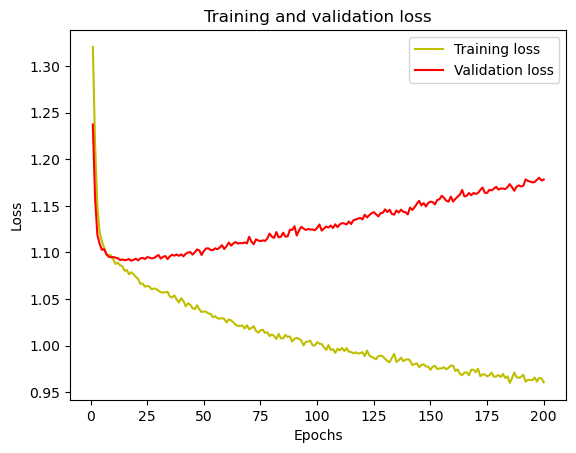

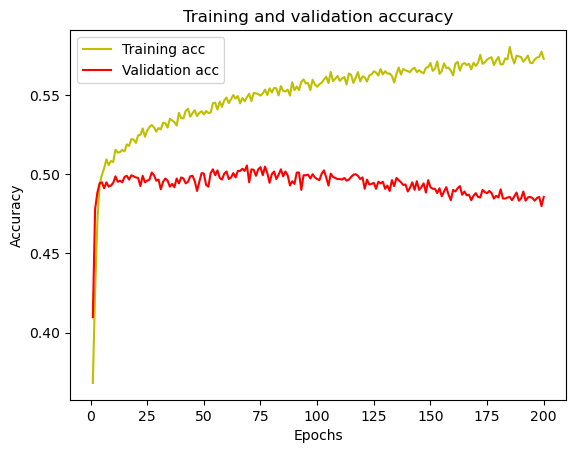

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
y_pred = model.predict(X_test)

In [55]:
y_pred.max(axis=1)

array([0.36320087, 0.8738743 , 0.35387805, ..., 0.49468827, 0.49468827,
       0.49212492], dtype=float32)

In [73]:
y_pred_encoded = []
for i in range(y_pred.shape[0]):
    y_pred_encoded.append(list((y_pred[i] == y_pred.max(axis=1)[i]).astype(int)))

In [98]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [115]:
predicted_labels = list(le.inverse_transform(y_pred_encoded).reshape(1,-1)[0])

In [116]:
true_labels = list(le.inverse_transform(y_test).reshape(1,-1)[0])

In [123]:
cm=confusion_matrix(true_labels, predicted_labels, labels=list(le.categories_[0]))

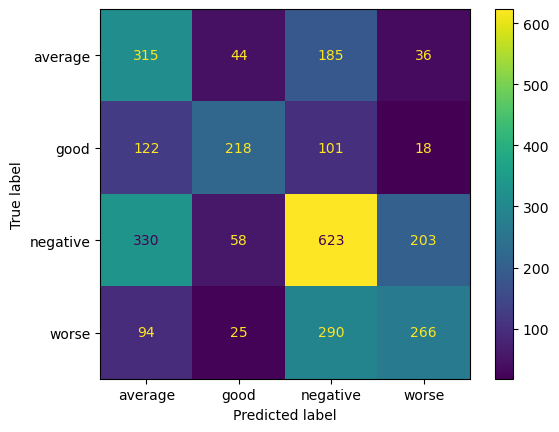

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(le.categories_[0]))
disp.plot()
plt.show()

In [126]:
print(classification_report(true_labels, predicted_labels, target_names=list(le.categories_[0])))

              precision    recall  f1-score   support

     average       0.37      0.54      0.44       580
        good       0.63      0.47      0.54       459
    negative       0.52      0.51      0.52      1214
       worse       0.51      0.39      0.44       675

    accuracy                           0.49      2928
   macro avg       0.51      0.48      0.48      2928
weighted avg       0.50      0.49      0.49      2928



In [128]:
y_train.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [129]:
y_test.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])